In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)

OpenCV: 4.13.0


In [2]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)

Image shape (H, W, C): (900, 1200, 3) | dtype: uint8


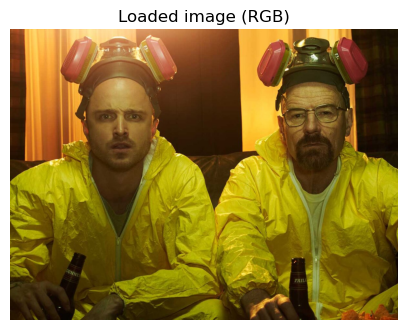

In [3]:
#TASK 1:
IMAGE_PATH = ("img.jpg")  

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()

In [4]:
# TODO (Task 2.1): print two pixel values:
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])

Top-left pixel: [146  68  22]
Center pixel: [73 48  7]


In [5]:
# TASK 2.1 ANSWER:

#The pixel at (row=0, col=0) and at the center returns an array of three values like [R, G, B].
#These three numbers represent the intensity of the Red, Green, and Blue channels.
#Each value ranges from 0 to 255, where:
#0 means no intensity,
#255 means maximum intensity of that color.

Reloaded shape: (900, 1200, 3) | dtype: uint8


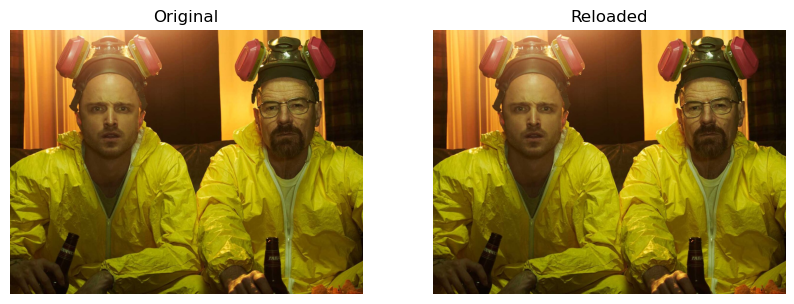

In [6]:
# TODO (Task 2.2): save and reload
out_path = "output_saved.png"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")

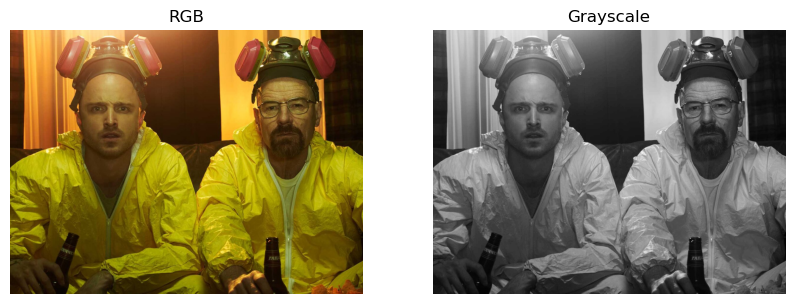

Gray shape: (900, 1200) | dtype: uint8


In [7]:
# TODO (Task 3.1): grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)

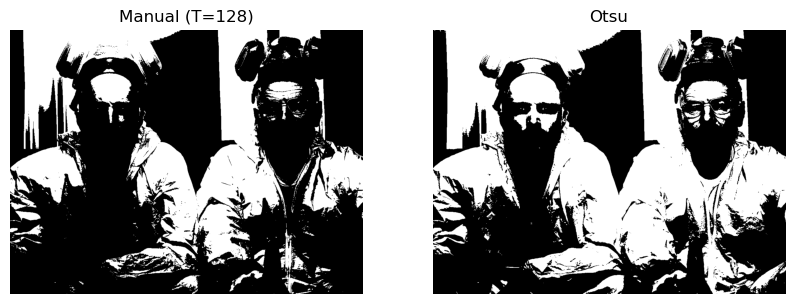

Otsu threshold chosen by OpenCV: 103.0


In [8]:
# TODO (Task 3.2): thresholding
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", _)

In [ ]:
# TASK 3.2 ANSWER:
# When using a manual threshold (for example, 128), all pixels above 128 become white (255), and all pixels below 128 become black (0).
# Otsu’s method automatically calculates the optimal threshold based on the image histogram.
# Usually, Otsu produces a better result when lighting conditions are uneven.

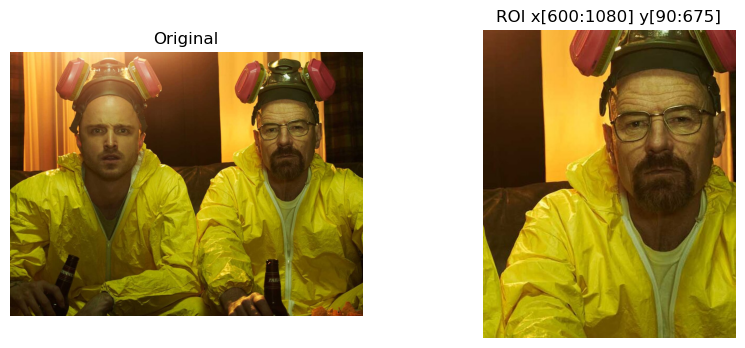

ROI shape: (585, 480, 3)


In [11]:
# Zoom only on the right person
h, w = img.shape[:2]

x1 = int(0.50 * w)
x2 = int(0.90 * w)

y1 = int(0.10 * h)
y2 = int(0.75 * h)

roi = img[y1:y2, x1:x2].copy()

show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)



In [12]:
#TASK 4.2 Answer:
# Images are stored as NumPy arrays using row-major order.
# This means:
# The first index represents the row (y-coordinate),
# The second index represents the column (x-coordinate).
# That is why we access pixels as img[y, x], not img[x, y].

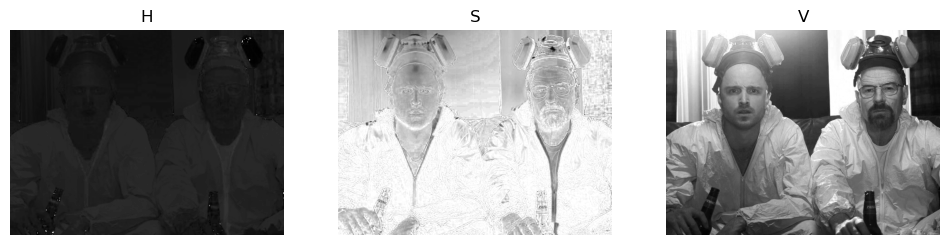

In [13]:
# TODO (Task 5.1): HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i); plt.imshow(ch, cmap="gray"); plt.title(name); plt.axis("off")
plt.show()

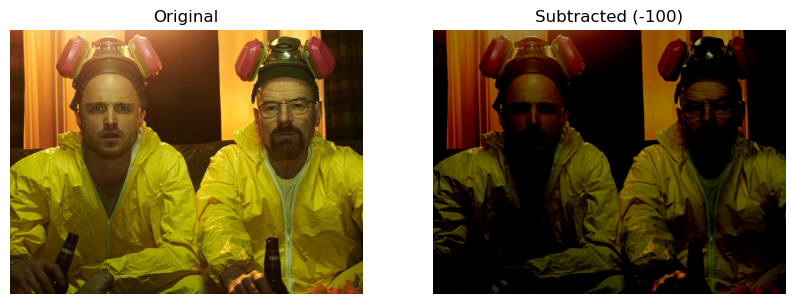

In [14]:
# TODO (Task 6.1): Subtracting an intensity (darkening)
sub_val = 100 
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

In [17]:
# TASK 6.1 ANSWER: 

# When increasing sub_val, the image becomes darker.

# This happens because we decrease the intensity of each pixel. Lower pixel values result in darker colors.
# OpenCV ensures that values do not go below 0.

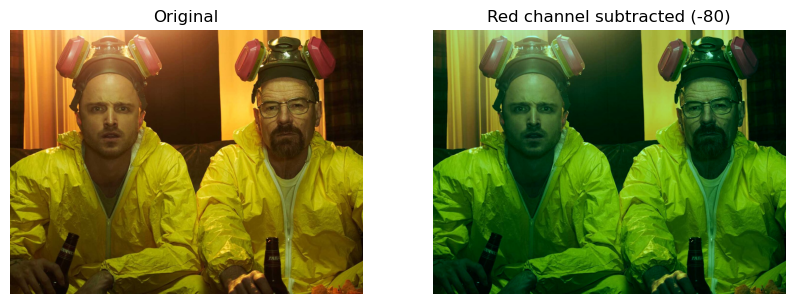

In [18]:
# TODO (Task 6.2): subtract from Red channel only
sub_val_r = 80

img_red_only = img.copy()
# RGB: channel 0=R, 1=G, 2=B
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")

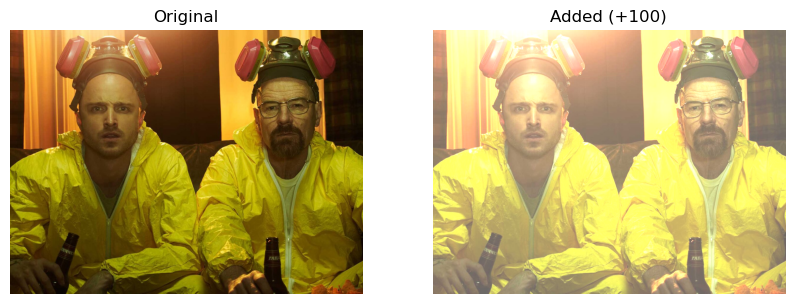

In [19]:
# TODO (Task 6.3): Adding an intensity
add_val = 100  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

In [ ]:
# Task 6.3 ANSWER:
# When increasing add_val, the image becomes brighter.
# This happens because pixel intensity increases. Higher pixel values (closer to 255) make the image lighter. OpenCV ensures that values do not exceed 255.

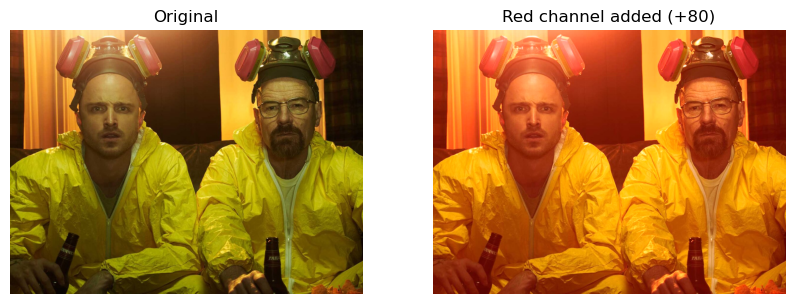

In [20]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80
img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")

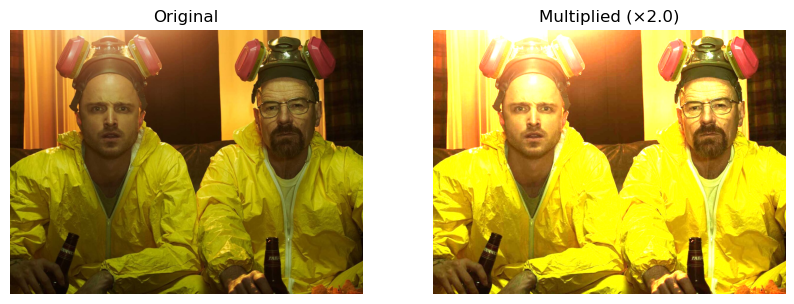

In [21]:
# TODO (Task 6.5): Multiplying by a constant (contrast/brightness change)

factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

In [ ]:
# TASK 6.5 ANSWER:
# If we multiply the image by a factor greater than 1, the image becomes brighter and contrast increases.
# If we multiply by a factor less than 1, the image becomes darker.
# Multiplication increases the difference between pixel values, which affects both brightness and contrast.


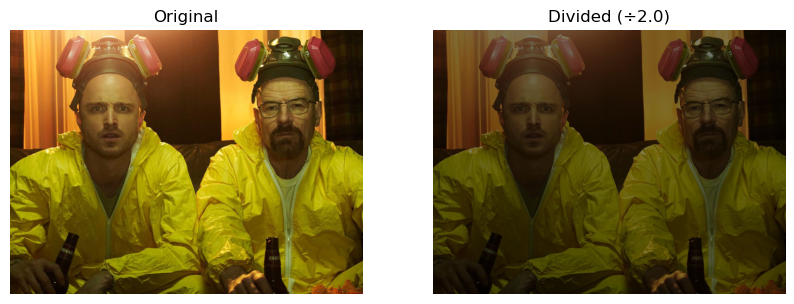

In [22]:
# TODO (Task 6.6): Dividing by a constant

divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")

In [ ]:
#TASK 6.6 ANSWER:
# If we divide by a number greater than 1, pixel values decrease and the image becomes darker.
# If we divide by a number less than 1, pixel values increase and the image becomes brighter (possibly saturating at 255).
# Division works similarly to multiplication but in the opposite direction.